## Part 10: Working with dates and time series data

What we will learn  
1. Properly read in data to use date time functionality
2. Filter by date times
3. Group dates by resampling timeframes
4. Plotting with time series data

Coverting 'Date' column which has string datatype, to date datatype while reading the file

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('data/ETH_1h.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [7]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [8]:
a = df.loc[0, 'Date']

In [9]:
df.loc[0, 'Date'].day_name()

'Friday'

In [10]:
df['Date'].dt.day_name() # accessing dt class is similar to accessing str class in series object, practiced earlier

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [11]:
df['DayOfWeek'] = df['Date'].dt.day_name() # adding a DayOfWeek column to view the days of the week

In [12]:
df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


Accessing earliest and latest dates in the df

In [13]:
 df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [14]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [15]:
df.loc[df['Date'].idxmax(), 'DayOfWeek']

'Friday'

In [16]:
df['Date'].max() -  df['Date'].min()

Timedelta('986 days 09:00:00')

In [17]:
filt = (df['Date'] >= '2020')

In [18]:
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [19]:
filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [20]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [21]:
df.set_index('Date', inplace = True)
df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


Getting data for 2019 after setting index for the dates

In [22]:
df.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


Accessing data of January and February of 2020

In [23]:
df['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [24]:
df['2020-01':'2020-02']['Close'].mean()

195.1655902777778

Getting the highest value for a specific day

In [25]:
df.loc['2020-01-01']['High'].max()

132.68

Resampling data with the Days 'D'

In [27]:
df.loc['2017-07-01']['High']

Date
2017-07-01 23:00:00    264.97
2017-07-01 22:00:00    264.36
2017-07-01 21:00:00    260.56
2017-07-01 20:00:00    262.00
2017-07-01 19:00:00    260.88
2017-07-01 18:00:00    266.73
2017-07-01 17:00:00    268.44
2017-07-01 16:00:00    272.57
2017-07-01 15:00:00    272.74
2017-07-01 14:00:00    269.90
2017-07-01 13:00:00    274.93
2017-07-01 12:00:00    275.01
2017-07-01 11:00:00    279.99
Name: High, dtype: float64

In [32]:
highs = df['High'].resample('D').max()

In [33]:
highs['2020-01-01']

132.68

In [34]:
%matplotlib inline

<Axes: xlabel='Date'>

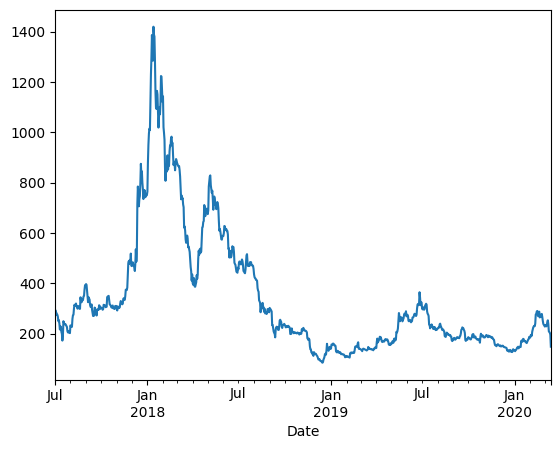

In [35]:
highs.plot()

#### resampling multiple columns at once

In [40]:
sample =  df.resample('W').agg({'Close':'mean', 'High':'max', 'Low':'min', 'Volume':'sum'})

In [42]:
sample

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23674 entries, 2020-03-13 20:00:00 to 2017-07-01 11:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     23674 non-null  object 
 1   Open       23674 non-null  float64
 2   High       23674 non-null  float64
 3   Low        23674 non-null  float64
 4   Close      23674 non-null  float64
 5   Volume     23674 non-null  float64
 6   DayOfWeek  23674 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


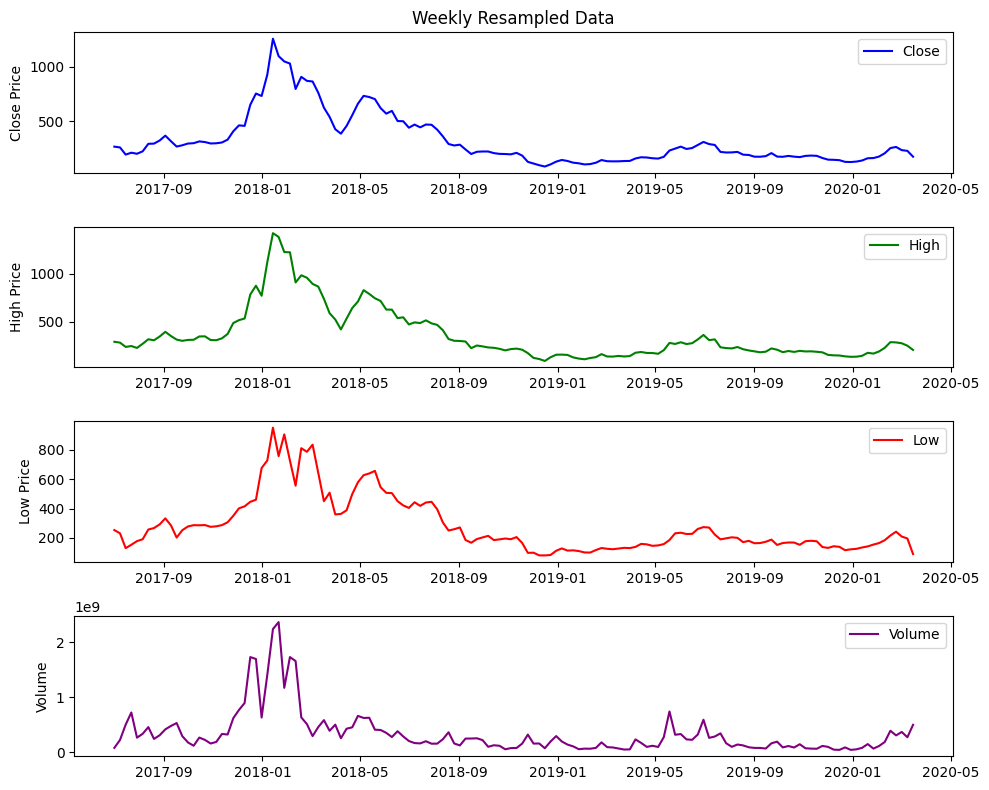

In [43]:
import matplotlib.pyplot as plt

# Assuming 'sample' is your resampled DataFrame
# You may need to import 'pandas' if not already done

# Create subplots for each column you want to plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

# Plot 'Close' column
axes[0].plot(sample.index, sample['Close'], label='Close', color='blue')
axes[0].set_ylabel('Close Price')

# Plot 'High' column
axes[1].plot(sample.index, sample['High'], label='High', color='green')
axes[1].set_ylabel('High Price')

# Plot 'Low' column
axes[2].plot(sample.index, sample['Low'], label='Low', color='red')
axes[2].set_ylabel('Low Price')

# Plot 'Volume' column
axes[3].plot(sample.index, sample['Volume'], label='Volume', color='purple')
axes[3].set_ylabel('Volume')

# Set titles and legends
axes[0].set_title('Weekly Resampled Data')
for ax in axes:
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
